# Your "Off-facebook_activity" Report

# Author: David Gibson 


# Purpose


My data report is over the facebook data provided by Dr. Silva. It will consist of different analyses and its purpose is to show where most of his off-facebook data is coming from.   

# 1. Overview

My hypothesis for Dr. Silva's off-facebook data usage is that he uses facebook as a login option a lot. This allows facebook to store data from other apps on your phone or computer. I will be importing data into jupyter that will allow me to figure out if this hypothesis is true or false. 

In [38]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd 

In [39]:
with open(r'/Users/davidgibson/Desktop/Data in Emerging Media and Technology/facebook-davidsilva100046_toshare/ads_and_businesses/your_off-facebook_activity.json') as a: 
    act = json.load(a) 
print(act.keys())

dict_keys(['off_facebook_activity'])


# 2. Data

I got this data from the file Dr. Silva gave us to use. I then proceded to upload the json file into jupyter. This allowed me to use the data and try to prove that my hypothesis is true.    

In [40]:
type(act['off_facebook_activity'])

list

In [41]:
act['off_facebook_activity'][0]

{'name': 'U.S. Bank - Inspired by customers',
 'events': [{'id': 1591992844216198,
   'type': 'ACTIVATE_APP',
   'timestamp': 1594274368},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594239280},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594156238},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594066670},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593919348},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593652182},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593651360},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593273365},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593127728},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593100373},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593095964},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1592933608},
  {'id': 15919

In [42]:
type(act['off_facebook_activity'][0])

dict

In [43]:
act['off_facebook_activity'][0].keys()

dict_keys(['name', 'events'])

In [44]:
act['off_facebook_activity'][0]['events'][0]['type']

'ACTIVATE_APP'

# 3. Data Preparation

I used to Loop Method to get the lengths of each list from the name key data values. This allows me to view the data lengths and get an idea of what other platforms are using Dr. Silva's data. 

In [45]:
act['off_facebook_activity'][0]['events'][0]['type'] == 'ACTIVATE_APP'

True

In [46]:
app_requests = [x['name'] for x in act['off_facebook_activity']]
all_event_count = [len(x['events']) for x in act['off_facebook_activity']]
activation_count = [len([x for x in j['events'] if x['type'] == 'ACTIVATE_APP']) for j in act['off_facebook_activity']]
custom_count = [len([x for x in j['events'] if x['type'] == 'CUSTOM']) for j in act['off_facebook_activity']]
search_count = [len([x for x in j['events'] if x['type'] == 'SEARCH']) for j in act['off_facebook_activity']]
view_content_count = [len([x for x in j['events'] if x['type'] == 'VIEW_CONTENT']) for j in act['off_facebook_activity']] 
ad_request_count = [len([x for x in j['events'] if x['type'] == 'AD_REQUEST']) for j in act['off_facebook_activity']] 
page_view_count = [len([x for x in j['events'] if x['type'] == 'PAGE_VIEW']) for j in act['off_facebook_activity']]

# Data Visualization Charts/Graphs

Here I used graphs and charts to show the off-facebook activity of Dr. Silva's data.

In [47]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = [] 
view = [] 

for i in act['off_facebook_activity']: 
    apps.append(i['name']) 
    events.append((len(i['name']))) 
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))
    

In [48]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,U.S. Bank - Inspired by customers,33,18,0,0,0,0,0
1,"Egg, Inc.",9,109,0,0,0,35,0
2,AP News,7,133,325,0,0,7,0
3,TikTok - Make Your Day,22,99,267,5,0,0,0
4,uoregon.edu,11,0,0,0,0,0,1


In [53]:
sub_apps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Page Views', 'View Content', 'Ad Request']].loc[appbyevent['Event Count'] > 10]
sub_apps                       
                

,App,Event Count,Activate App,Custom,Page Views,View Content,Ad Request
399,"Ticketmasterï¼Buy, Sell Tickets to Concerts, ...",52,1,0,0,0,0
67,"Adobe Acrobat Reader: PDF Viewer, Editor & Cre...",50,1,0,0,0,0
377,The NBC App - Stream Live TV and Episodes for ...,50,3,15,0,0,0
30,"Spotify: Listen to new music, podcasts, and songs",49,29,0,0,0,0
23,Microsoft Outlook: Organize Your Email & Calendar,49,72,0,0,0,0
...,...,...,...,...,...,...,...
74,bookvip.com,11,0,0,1,0,0
260,publons.com,11,0,0,4,3,0
4,uoregon.edu,11,0,0,1,0,0
87,bikemap.net,11,0,0,5,0,0


In [56]:
sub_apps['App']

399    Ticketmasterï¼Buy, Sell Tickets to Concerts, ...
67     Adobe Acrobat Reader: PDF Viewer, Editor & Cre...
377    The NBC App - Stream Live TV and Episodes for ...
30     Spotify: Listen to new music, podcasts, and songs
23     Microsoft Outlook: Organize Your Email & Calendar
                             ...                        
74                                           bookvip.com
260                                          publons.com
4                                            uoregon.edu
87                                           bikemap.net
201                                          dummies.com
Name: App, Length: 318, dtype: object

# Data Visualization Charts/Graphs

Here I used graphs and charts to show the off-facebook activity of Dr. Silva's data.

In [63]:
from scipy import stats

In [64]:
obs = np.array([appbyevent['Activate App'][:4], appbyevent['Custom'][:4]])
obs

array([[ 1,  1,  3, 29],
       [ 0,  0, 15,  0]])

In [65]:
stats.chi2_contingency(obs)

(37.23039215686274,
 4.1128194412813456e-08,
 3,
 array([[ 0.69387755,  0.69387755, 12.48979592, 20.12244898],
        [ 0.30612245,  0.30612245,  5.51020408,  8.87755102]]))

In [66]:
sub_apps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] > 10]
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views
399,"Ticketmasterï¼Buy, Sell Tickets to Concerts, ...",52,1,0,0,0,0
67,"Adobe Acrobat Reader: PDF Viewer, Editor & Cre...",50,1,0,0,0,0
377,The NBC App - Stream Live TV and Episodes for ...,50,3,15,0,0,0
30,"Spotify: Listen to new music, podcasts, and songs",49,29,0,0,0,0
23,Microsoft Outlook: Organize Your Email & Calendar,49,72,0,0,0,0
...,...,...,...,...,...,...,...
398,inverse.com,11,0,0,0,1,0
314,tvguide.com,11,0,0,0,1,0
111,nbcnews.com,11,0,0,0,0,8
444,chownow.com,11,0,0,0,2,0


In [67]:
sub_obs = np.array(sub_apps.drop(columns = ['App', 'Event Count']))
sub_obs

array([[ 1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0],
       [ 3, 15,  0,  0,  0],
       ...,
       [ 0,  0,  0,  0,  8],
       [ 0,  0,  0,  2,  0],
       [ 0,  3,  0,  4,  3]])

In [70]:
appbyevent.loc[appbyevent['App'] == "Egg, Inc."]

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
1,"Egg, Inc.",9,109,0,0,0,35,0


In [71]:
appbyevent.loc[appbyevent['App'] == "cnn.com"]

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
114,cnn.com,7,0,0,0,6,0,8


In [72]:
sub_apps['App']

399    Ticketmasterï¼Buy, Sell Tickets to Concerts, ...
67     Adobe Acrobat Reader: PDF Viewer, Editor & Cre...
377    The NBC App - Stream Live TV and Episodes for ...
30     Spotify: Listen to new music, podcasts, and songs
23     Microsoft Outlook: Organize Your Email & Calendar
                             ...                        
398                                          inverse.com
314                                          tvguide.com
111                                          nbcnews.com
444                                          chownow.com
7                                            wayfair.com
Name: App, Length: 318, dtype: object

In [73]:
cats = ['app', 'app', 'app', 'app', 'site', 'app', 'site', 'unknown', 'app', 'app', 'site', 'site', 'site', 'site', 'site', 'site', 'site', 'site', 'unknown', 'app']
cats

['app',
 'app',
 'app',
 'app',
 'site',
 'app',
 'site',
 'unknown',
 'app',
 'app',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'unknown',
 'app']

In [78]:
bins = np.linspace(0, 500, 20)
plt.hist(sub_apps['Event Count'].loc[sub_apps['category'] == 'app'], bins, alpha = 0.5, label = "Apps")
plt.hist(sub_apps['Event Count'].loc[sub_apps['category'] == 'site'], bins, alpha = 0.5, label = "Websites")
plt.legend(loc = 'upper right')
plt.show()

KeyError: 'category'

/Users/davidgibson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/davidgibson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


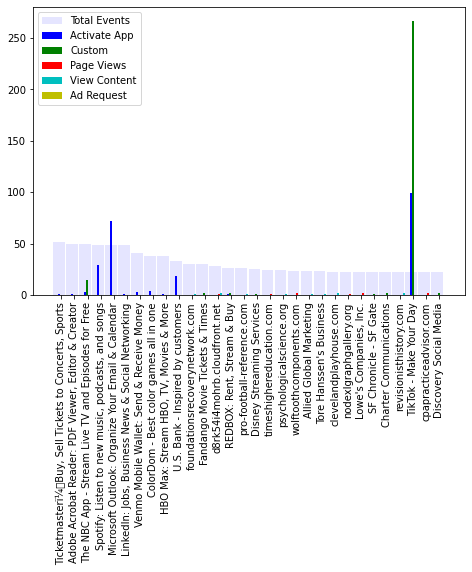

In [54]:
appbyevent = appbyevent.sort_values(by = ['Event Count'], ascending = False)
X = np.arange(30)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Event Count'][0:30], color = 'b', alpha = .1, width = .90)
ax.bar(X + 0.00, appbyevent['Activate App'][0:30], color='b', width = .15)
ax.bar(X + 0.15, appbyevent['Custom'][0:30], color='g', width = .15)
ax.bar(X + 0.30, appbyevent['Page Views'][0:30], color='r', width = .15)
ax.bar(X + 0.45, appbyevent['View Content'][0:30], color='c', width = .15)
ax.bar(X+.60, appbyevent['Ad Request'][0:30], color = 'y', width = .15)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:30]), rotation=90)
ax.legend(labels=['Total Events' ,'Activate App', 'Custom', 'Page Views', 'View Content', 'Ad Request'])
plt.show()

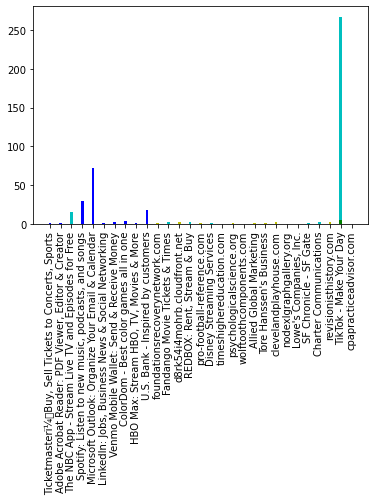

In [55]:
X = np.arange(30)
plt.bar(appbyevent['App'][0:29], appbyevent['Activate App'][0:29], color='b', width = .25)
plt.bar(appbyevent['App'][0:29], appbyevent['Custom'][0:29], color='c', width = .25)
plt.bar(appbyevent['App'][0:29], appbyevent['Search'][0:29], color='g', width = .25)
plt.bar(appbyevent['App'][0:29], appbyevent['View Content'][0:29], color='y', width = .25)
plt.xticks(rotation=90)
plt.show()

# Conclusion

I have come to the conclusion that Dr. Silva's off-facebook data is mainly used by other apps and websites. This data is shown in the above graphs and charts. This also proves my hypothesis to be true because I said above that I thought the data was from login information from other apps and websites. This is true.   

# Limitations 

I personally struggled with the scipy.stats part of the assignment. I just could not get an understanding on how to impliment the code. 